<a href="https://colab.research.google.com/github/davinnnnn/Natural-Language-Processing/blob/main/%EB%84%A4%EC%9D%B4%EB%B2%84_%EC%98%81%ED%99%94_%EB%A6%AC%EB%B7%B0_%EA%B0%90%EC%84%B1_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# `konlpy`라는 패키지를 설치합니다.
# `konlpy`는 한국어 정보처리를 위한 파이썬 라이브러리로, 한국어 텍스트의 토큰화, 형태소 분석, 품사 태깅 등의 기능을 제공합니다.
!pip install konlpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 76.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 51.1 MB/s eta 0:00:00


In [2]:
# 필요한 라이브러리와 모듈들을 임포트합니다.

# `pickle` 모듈은 파이썬 객체 구조를 직렬화하거나 역직렬화하는데 사용됩니다.
# 이를 통해 데이터 구조나 객체 상태를 파일로 저장하거나, 이를 다시 로드할 수 있습니다.
import pickle

# `pandas`는 데이터 조작 및 분석을 위한 라이브러리입니다. 특히, 데이터프레임이라는 구조를 제공하여 테이블 형태의 데이터를 쉽게 다룰 수 있습니다.
import pandas as pd

# `numpy`는 다차원 배열 및 행렬 연산에 필요한 기능들을 제공하는 라이브러리입니다.
import numpy as np

# `matplotlib.pyplot`은 데이터 시각화를 위한 라이브러리입니다. 그래프나 차트를 그리기 위해 사용됩니다.
import matplotlib.pyplot as plt

# `re` 모듈은 정규 표현식 연산을 지원하는 라이브러리입니다. 텍스트 데이터의 패턴을 탐색하거나 대체하는데 사용됩니다.
import re

# `urllib.request`는 URL을 사용하여 데이터를 가져오는 라이브러리입니다. 웹 데이터의 스크래핑이나 다운로드에 활용됩니다.
import urllib.request

# `Okt`는 `konlpy` 라이브러리의 한국어 형태소 분석기 중 하나입니다. 한국어 텍스트를 형태소 단위로 분리하거나 품사를 태깅하는 데 사용됩니다.
from konlpy.tag import Okt

# `tqdm`는 진행 바를 보여주는 라이브러리로, 반복문의 진행 상황을 시각적으로 확인할 수 있게 해줍니다.
from tqdm import tqdm

# `Tokenizer`는 텍스트 데이터를 토큰화하기 위한 도구입니다. 텍스트를 단어나 문장 단위로 분리하는 데 사용됩니다.
from tensorflow.keras.preprocessing.text import Tokenizer

# `pad_sequences`는 시퀀스 데이터(예: 문장)를 동일한 길이로 패딩하는 데 사용됩니다. 주로 딥러닝 모델의 입력으로 사용되는 시퀀스 데이터를 일정한 길이로 맞추기 위해 사용됩니다.
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [3]:
# `urllib.request.urlretrieve` 함수는 지정된 URL에서 파일을 직접 다운로드하여 로컬 디스크에 저장하는 역할을 합니다.

# 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt' URL의 데이터를 로컬의 'ratings_train.txt'라는 파일로 저장합니다.
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")

# 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt' URL의 데이터를 로컬의 'ratings_test.txt'라는 파일로 저장합니다.
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")


('ratings_test.txt', <http.client.HTTPMessage at 0x78bfbde295d0>)

In [4]:
# `pd.read_table` 함수는 탭으로 구분된 데이터를 읽기 위한 pandas 함수입니다.

# 'ratings_train.txt' 파일을 읽어와 데이터프레임 형태로 'train_data' 변수에 저장합니다.
train_data = pd.read_table('ratings_train.txt')

# 'ratings_test.txt' 파일을 읽어와 데이터프레임 형태로 'test_data' 변수에 저장합니다.
test_data = pd.read_table('ratings_test.txt')


In [5]:
# `len` 함수는 입력으로 주어진 객체의 길이(또는 개수)를 반환합니다.
# 여기서는 `train_data` 데이터프레임의 행의 개수, 즉 훈련용 리뷰의 총 개수를 반환합니다.

# `train_data` 데이터프레임에 저장된 훈련용 리뷰의 총 개수를 출력합니다.
print('훈련용 리뷰 개수 :', len(train_data))


훈련용 리뷰 개수 : 150000


In [6]:
# `train_data[:5]`는 데이터프레임 `train_data`의 처음부터 5번째 행까지의 데이터를 선택합니다.
# 파이썬의 인덱싱은 0부터 시작하므로, 0, 1, 2, 3, 4 번째 행을 선택하는 것과 동일합니다.

# `train_data` 데이터프레임의 상위 5개 행을 출력합니다.
train_data[:5]


,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [7]:
# `len` 함수를 사용하여 `test_data` 데이터프레임의 행의 개수를 구합니다.
# 이는 테스트용 리뷰의 총 개수를 나타냅니다.

# `test_data` 데이터프레임에 저장된 테스트용 리뷰의 총 개수를 출력합니다.
print('테스트용 리뷰 개수 :', len(test_data))


테스트용 리뷰 개수 : 50000


In [8]:
# `nunique()` 메서드는 데이터프레임의 열에서 중복 값을 제외한 고유한 값의 개수를 반환합니다.

# `train_data['document'].nunique()`는 `document` 열의 중복을 제외한 고유한 리뷰의 개수를 구합니다.
# `train_data['label'].nunique()`는 `label` 열의 중복을 제외한 고유한 레이블 값의 개수를 구합니다.
# 레이블은 일반적으로 감성 분석(긍정/부정)과 같은 분류 작업에 사용되므로, 레이블의 고유한 값의 개수는 클래스의 개수와 동일할 것입니다.

train_data['document'].nunique(), train_data['label'].nunique()


(146182, 2)

In [9]:
# `drop_duplicates()` 메서드는 데이터프레임에서 중복된 행을 제거하는 데 사용됩니다.

# subset 인자에 'document'를 지정하여 `document` 열의 중복 값을 기준으로 중복 행을 찾습니다.
# inplace=True를 설정하여 `train_data` 데이터프레임 자체를 수정하고, 새로운 데이터프레임을 반환하지 않습니다.

# `train_data` 데이터프레임에서 `document` 열의 중복된 값을 제거합니다.
train_data.drop_duplicates(subset=['document'], inplace=True)


In [10]:
# `len` 함수를 사용하여 `train_data` 데이터프레임의 행의 개수를 구합니다.
# 이는 중복 값을 제거한 후의 리뷰 샘플의 총 개수를 나타냅니다.

# `train_data` 데이터프레임에 저장된 리뷰 샘플의 총 개수를 출력합니다.
print('총 샘플의 수 :', len(train_data))


총 샘플의 수 : 146183


<Axes: >

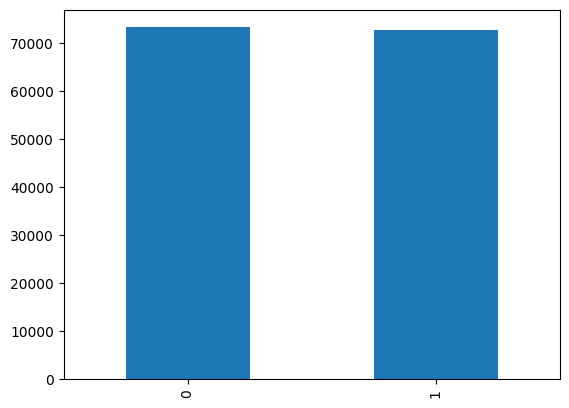

In [11]:
# `value_counts()` 메서드는 데이터프레임의 열에서 각 값의 출현 횟수를 반환합니다.

# `train_data['label'].value_counts()`는 `label` 열의 각 값(레이블)의 출현 횟수를 구합니다.
# `plot()` 메서드는 시각화를 위해 사용되며, `kind='bar'`를 통해 막대 그래프로 그릴 것을 지정합니다.

# `train_data` 데이터프레임의 `label` 열의 값 분포를 막대 그래프로 표현합니다.
train_data['label'].value_counts().plot(kind = 'bar')


In [12]:
# `groupby('label')`는 데이터프레임을 'label' 열의 값에 따라 그룹화합니다.
# `size()` 메서드는 각 그룹의 크기(개수)를 반환합니다.
# `reset_index(name='count')`는 인덱스를 리셋하며, 그룹별 크기(개수)의 열 이름을 'count'로 지정합니다.

# `train_data` 데이터프레임을 'label' 열의 값에 따라 그룹화하고,
# 각 그룹의 크기(개수)를 계산하여 'count'라는 열 이름으로 저장한 후, 그 결과를 출력합니다.
print(train_data.groupby('label').size().reset_index(name = 'count'))


   label  count
0      0  73342
1      1  72841


In [13]:
# `isnull()` 메서드는 데이터프레임 내의 각 원소가 결측값 (NaN)인지 아닌지를 나타내는 불린(Boolean) 값을 반환합니다.
# `values.any()`는 반환된 불린 값 중 하나라도 True가 있는지를 검사합니다.

# `train_data` 데이터프레임 내에 결측값이 하나라도 있는지를 검사합니다.
print(train_data.isnull().values.any())


True


In [14]:
# `isnull()` 메서드는 데이터프레임의 각 원소가 결측값 (NaN)인지 아닌지를 나타내는 불린(Boolean) 값을 반환합니다.
# `sum()` 메서드는 각 열별로 불린 값의 합계 (True는 1, False는 0으로 계산)를 반환하며,
# 이를 통해 각 열에서의 결측값의 개수를 알 수 있습니다.

# `train_data` 데이터프레임의 각 열에서 결측값의 개수를 계산하고 출력합니다.
print(train_data.isnull().sum())


id          0
document    1
label       0
dtype: int64


In [15]:
# `loc[]`는 데이터프레임의 특정 행과 열을 선택하기 위해 사용되는 인덱서입니다.
# `train_data.document.isnull()`은 `train_data`의 `document` 열에서 결측값인지 아닌지를 검사하여
# 불린(Boolean) 값 시리즈를 반환합니다.

# `train_data` 데이터프레임에서 `document` 열의 값이 결측값인 행들을 선택하고 출력합니다.
train_data.loc[train_data.document.isnull()]


,id,document,label
25857,2172111,NaN,1


In [16]:
# `dropna(how = 'any')` 메서드는 데이터프레임에서 결측값을 포함하고 있는 행을 제거합니다.
# `how = 'any'` 옵션은 행 내에서 어떤 열이라도 결측값을 포함하면 해당 행을 제거하라는 의미입니다.

# `train_data` 데이터프레임에서 결측값을 포함하는 모든 행을 제거합니다.
train_data = train_data.dropna(how = 'any')

# `isnull().values.any()`는 데이터프레임 내에 결측값이 하나라도 있는지를 검사합니다.
# 이를 통해 앞서의 제거 작업이 제대로 이루어졌는지 확인할 수 있습니다.

# 제거 작업 후 `train_data` 데이터프레임 내에 결측값이 남아있는지 확인하고 그 결과를 출력합니다.
print(train_data.isnull().values.any())


False


In [17]:
# `len()` 함수는 입력된 객체의 길이(또는 항목의 개수)를 반환합니다.
# 여기서는 `train_data` 데이터프레임의 행의 개수를 반환하게 됩니다.

# `train_data` 데이터프레임의 샘플 개수를 출력합니다.
print(len(train_data))


146182


In [18]:
# `re.sub()` 함수는 정규 표현식을 사용하여 문자열에서 일치하는 부분을 다른 문자열로 대체합니다.
# 첫 번째 인자는 찾을 패턴, 두 번째 인자는 대체할 문자열, 세 번째 인자는 대상 문자열입니다.

# r'[^a-zA-Z ]' 패턴은
# - `^`: 문자열 시작을 나타내는 메타 문자가 아니라, 여기서는 부정 문자 클래스를 의미합니다.
# - `a-zA-Z`: 소문자 a부터 z, 대문자 A부터 Z까지의 모든 알파벳을 의미합니다.
# - ` ` (공백): 공백 문자를 의미합니다.
# 따라서, 이 패턴은 알파벳과 공백을 제외한 모든 문자를 찾아내는 패턴입니다.

# 알파벳과 공백을 제외하고 모든 문자를 제거합니다.
eng_text = 'do!!! you expect... people~ to~ read~ the FAQ, etc. and actually accept hard~! atheism?@@'
print(re.sub(r'[^a-zA-Z ]', '', eng_text))


do you expect people to read the FAQ etc and actually accept hard atheism


In [19]:
# `.str.replace()` 메서드는 문자열 내에서 일치하는 부분을 다른 문자열로 대체합니다.
# 첫 번째 인자는 찾을 패턴, 두 번째 인자는 대체할 문자열(여기서는 빈 문자열로 제거하는 효과를 가져옴)입니다.

# "[^ㄱ-ㅎㅏ-ㅣ가-힣 ]" 패턴은
# - `^`: 부정 문자 클래스를 의미합니다. (여기서는 대괄호([]) 내부의 ^는 부정을 의미합니다.)
# - `ㄱ-ㅎㅏ-ㅣ가-힣`: 한글 자음, 모음 및 모든 한글 문자를 포함합니다.
# - ` ` (공백): 공백 문자를 의미합니다.
# 따라서, 이 패턴은 한글과 공백을 제외한 모든 문자를 찾아내는 패턴입니다.

# `train_data['document']` 열에서 한글과 공백을 제외하고 모든 문자를 제거합니다.
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

# `train_data`의 상위 5개 행을 출력하여 결과를 확인합니다.
train_data[:5]


<ipython-input-19-0ac6165605ad>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [20]:
# `.str.replace()` 메서드를 사용하여 문자열 내의 패턴을 다른 문자열로 대체합니다.
# '^ +': 패턴은
# - `^`: 문자열의 시작을 나타내는 메타문자입니다.
# - `+`: 앞의 문자(여기서는 공백)가 1번 이상 반복될 때를 나타내는 메타문자입니다.
# 따라서, 이 패턴은 문자열 시작에서 연속된 공백을 찾습니다.

# `train_data['document']` 열에서 문자열 시작 부분의 연속된 공백을 제거합니다.
train_data['document'] = train_data['document'].str.replace('^ +', "")

# `replace()` 메서드를 사용하여 데이터프레임 내의 특정 값을 다른 값으로 대체합니다.
# 빈 문자열('')인 `document` 값을 NaN으로 변경합니다.
train_data['document'].replace('', np.nan, inplace=True)

# 결측값의 개수를 확인하기 위해 `isnull().sum()` 메서드를 사용합니다.
# `train_data` 데이터프레임 내 각 열에서 결측값의 개수를 출력합니다.
print(train_data.isnull().sum())


id            0
document    789
label         0
dtype: int64


<ipython-input-20-eb1e14487e67>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace('^ +', "")


In [21]:
# `loc[]` 메서드는 특정 조건을 만족하는 행과 열을 선택하는 데 사용됩니다.

# `train_data.document.isnull()`:
# - `document.isnull()`은 `document` 열의 각 값이 NaN인지 아닌지를 판별하여 Boolean 형태의 Series를 반환합니다.
# - `train_data.loc[train_data.document.isnull()]`은 `document` 열의 값이 NaN인 모든 행을 선택합니다.

# `train_data` 데이터프레임에서 `document` 열의 값이 NaN인 행들 중 상위 5개 행을 선택하여 출력합니다.
train_data.loc[train_data.document.isnull()][:5]


,id,document,label
404,4221289,NaN,0
412,9509970,NaN,1
470,10147571,NaN,1
584,7117896,NaN,0
593,6478189,NaN,0


In [22]:
# `dropna()` 메서드는 데이터프레임에서 NaN 값을 포함하는 행 또는 열을 제거하는 데 사용됩니다.
# `how='any'` 인자는 NaN 값을 포함하는 어떤 행이라도 제거하라는 의미입니다.

# `train_data` 데이터프레임에서 NaN 값을 포함하는 모든 행을 제거합니다.
train_data = train_data.dropna(how = 'any')

# `len()` 함수는 주어진 객체의 길이나 항목의 개수를 반환합니다.
# 여기서는 `train_data` 데이터프레임의 행의 개수를 반환하게 됩니다.

# 제거 후의 `train_data` 데이터프레임의 행 개수(샘플 개수)를 출력합니다.
print(len(train_data))


145393


In [23]:
# `drop_duplicates()` 메서드는 데이터프레임에서 중복된 행을 제거하는 데 사용됩니다.
# `subset=['document']` 인자를 사용하여 `document` 열의 중복 값만을 기준으로 중복 행을 제거합니다.
test_data.drop_duplicates(subset = ['document'], inplace=True)

# `.str.replace()` 메서드를 사용하여 `document` 열의 문자열 내에서 한글과 공백을 제외한 모든 문자를 제거합니다.
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

# 문자열 시작 부분의 연속된 공백을 제거합니다.
test_data['document'] = test_data['document'].str.replace('^ +', "")

# 빈 문자열('')인 `document` 값을 NaN으로 변경합니다.
test_data['document'].replace('', np.nan, inplace=True)

# `dropna()` 메서드를 사용하여 NaN 값을 포함하는 모든 행을 제거합니다.
test_data = test_data.dropna(how='any')

# `len()` 함수를 사용하여 전처리 후의 `test_data` 데이터프레임의 행 개수(샘플 개수)를 출력합니다.
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))


전처리 후 테스트용 샘플의 개수 : 48852


<ipython-input-23-1c40973cae62>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
<ipython-input-23-1c40973cae62>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace('^ +', "")


In [24]:
# 불용어(stopwords)란, 자주 등장하지만 텍스트의 실질적인 의미 분석에 크게 기여하지 않는 단어를 의미합니다.
# 예를 들어, 조사, 접속사 등이 불용어로 지정될 수 있습니다.
# 여기에서는 일부 한국어 불용어를 리스트로 정의하였습니다.

stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']


In [25]:
# `Okt`는 한국어 자연어 처리를 위한 형태소 분석기입니다.
# 형태소 분석은 주어진 텍스트를 의미 있는 최소 단위인 형태소로 나누는 작업을 의미합니다.

# `Okt` 객체를 생성합니다.
okt = Okt()

# `morphs()` 메서드는 주어진 텍스트를 형태소로 분리하여 리스트로 반환합니다.
# `stem=True` 인자는 단어를 원형으로 변환해주는 옵션입니다.
result = okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔', stem = True)

print(result)


['오다', '이렇다', '것', '도', '영화', '라고', '차라리', '뮤직비디오', '를', '만들다', '게', '나다', '뻔']


In [26]:
# 빈 리스트 X_train을 초기화합니다. 이 리스트에는 토큰화 및 불용어가 제거된 문장들이 저장될 것입니다.
X_train = []

# tqdm 함수는 반복문의 진행 상황을 프로그레스 바 형태로 보여주는 라이브러리입니다.
# tqdm(train_data['document'])는 train_data의 document 열의 각 문장에 대해 반복하며 진행 상황을 시각적으로 보여줍니다.
for sentence in tqdm(train_data['document']):

    # okt.morphs 함수를 사용하여 문장을 토큰화합니다. stem=True는 동사를 원형으로 변환하는 옵션입니다.
    tokenized_sentence = okt.morphs(sentence, stem=True)

    # 리스트 컴프리헨션을 사용하여 토큰화된 문장에서 불용어를 제거합니다.
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords]

    # 불용어가 제거된 문장을 X_train 리스트에 추가합니다.
    X_train.append(stopwords_removed_sentence)


100%|██████████| 145393/145393 [06:26<00:00, 376.65it/s]


In [27]:
# X_train의 첫 3개 샘플을 출력합니다.
print(X_train[:3])


[['아', '더빙', '진짜', '짜증나다', '목소리'], ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'], ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다']]


In [28]:
# 테스트 데이터에 대한 전처리

X_test = [] # 전처리된 테스트 데이터를 저장할 리스트 초기화

# tqdm은 for문의 진행 상황을 시각적으로 표현해줍니다.
for sentence in tqdm(test_data['document']):

    # 1. Okt 형태소 분석기를 사용하여 문장을 형태소로 분해하고 어근을 추출합니다.
    tokenized_sentence = okt.morphs(sentence, stem=True)

    # 2. 분해된 형태소 중에서 불용어(stopwords)에 해당하지 않는 것만을 선택하여 새로운 문장을 생성합니다.
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords]

    # 3. 불용어를 제거한 형태소 리스트를 X_test에 추가합니다.
    X_test.append(stopwords_removed_sentence)

# 위의 과정을 통해 테스트 데이터셋에 대한 전처리를 완료하며, 형태소 단위로 토큰화된 문장들의 리스트를 X_test에 저장합니다.


100%|██████████| 48852/48852 [02:08<00:00, 379.74it/s]


In [29]:
# `Tokenizer`는 Keras에서 제공하는 텍스트 토큰화 유틸리티 클래스입니다.
# 이 클래스를 사용하면 텍스트 데이터를 벡터화할 수 있습니다.

# Tokenizer 객체를 생성합니다.
tokenizer = Tokenizer()

# `fit_on_texts` 메서드는 주어진 데이터에 대한 내부 단어장(vocabulary)을 생성합니다.
# X_train의 각 문장에 포함된 단어들에 대해 고유한 정수 인덱스를 할당합니다.
tokenizer.fit_on_texts(X_train)


In [30]:
# threshold는 단어의 등장 빈도수에 대한 임계값입니다. 이 값보다 작은 빈도수를 가진 단어를 희귀 단어로 간주합니다.
threshold = 3

# 여러 통계치를 계산하기 위한 초기값을 설정합니다.
total_cnt = len(tokenizer.word_index)  # 전체 단어의 개수
rare_cnt = 0  # 임계값보다 작은 빈도수를 가진 단어의 개수
total_freq = 0  # 모든 단어의 빈도수 합계
rare_freq = 0  # 희귀 단어의 빈도수 합계

# tokenizer.word_counts는 단어와 그 단어의 등장 빈도수를 가지는 딕셔너리입니다.
for key, value in tokenizer.word_counts.items():
    total_freq += value  # 모든 단어의 빈도수를 합산

    # 만약 단어의 등장 빈도수가 threshold보다 작다면, 희귀 단어로 간주하여 통계치를 업데이트합니다.
    if value < threshold:
        rare_cnt += 1
        rare_freq += value

# 통계치를 출력합니다.
print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s' % (threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt) * 100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq) * 100)


단어 집합(vocabulary)의 크기 : 43752
등장 빈도가 2번 이하인 희귀 단어의 수: 24337
단어 집합에서 희귀 단어의 비율: 55.62488571950996
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.8715872104872904


In [31]:
# 희귀 단어를 제외한 단어 집합의 크기를 계산합니다.
# 여기서 희귀 단어는 위에서 threshold를 기준으로 판별한 단어들입니다.

# total_cnt에서 rare_cnt(희귀 단어의 수)를 빼주어 희귀 단어를 제외한 단어의 수를 구하고,
# 0번 패딩 토큰을 고려하기 위해 1을 더해줍니다.
vocab_size = total_cnt - rare_cnt + 1

# 최종적으로 계산된 단어 집합의 크기를 출력합니다.
print('단어 집합의 크기 :', vocab_size)


단어 집합의 크기 : 19416


In [32]:
# 주어진 vocab_size를 이용하여 Tokenizer 객체를 생성합니다.
# 이 Tokenizer는 훈련 데이터에서 가장 빈도수가 높은 (vocab_size-1)개의 단어만 사용하게 됩니다.
# 나머지 단어들은 Out-Of-Vocabulary (OOV) 토큰으로 처리됩니다.
tokenizer = Tokenizer(vocab_size)

# X_train 데이터에 대해서 토큰화를 수행합니다. 이는 각 단어에 고유한 정수 인덱스를 부여하는 과정입니다.
tokenizer.fit_on_texts(X_train)

# texts_to_sequences 메서드는 주어진 텍스트 데이터를 위에서 부여된 정수 인덱스로 변환합니다.
# 이를 통해 텍스트 데이터를 정수 시퀀스로 변환하게 됩니다.
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


In [33]:
# X_train의 첫 3개의 문장(리스트)를 출력합니다.

# X_train은 각 문장에서 토큰화된 단어들이 해당 단어의 정수 인덱스로 변환된 시퀀스로 구성되어 있습니다.
# 따라서, 아래의 출력은 각 문장의 단어들이 어떻게 정수 인덱스로 매핑되었는지를 보여줄 것입니다.
# 예를 들면, 원래 문장 "이 영화 좋다"가 토큰화된 결과 ["이", "영화", "좋다"]는
# 정수 인덱스로 변환된 [5, 3, 50]과 같은 형태로 표현될 수 있습니다.
# (주: 여기서의 숫자는 예시입니다. 실제로는 단어에 부여된 정수 인덱스에 따라 다를 것입니다.)

print(X_train[:3])


[[50, 454, 16, 260, 659], [933, 457, 41, 602, 1, 214, 1449, 24, 961, 675, 19], [386, 2444, 2315, 5671, 2, 222, 9]]


In [34]:
# train_data에서 'label' 열을 추출하여 y_train에 저장합니다.
# 이렇게 함으로써, y_train은 각 훈련 데이터의 문장에 대한 감성 라벨(예: 긍정, 부정)을 포함하게 됩니다.
y_train = np.array(train_data['label'])

# test_data에서 'label' 열을 추출하여 y_test에 저장합니다.
# 이렇게 함으로써, y_test는 각 테스트 데이터의 문장에 대한 감성 라벨을 포함하게 됩니다.
y_test = np.array(test_data['label'])


In [35]:
# X_train에서 문장의 길이가 1 미만인 경우, 해당 문장의 인덱스를 drop_train에 저장합니다.
# enumerate를 사용하여 X_train의 각 문장과 해당 문장의 인덱스를 함께 가져옵니다.
# if len(sentence) < 1 조건문을 통해 문장의 길이가 1 미만인 경우를 확인합니다.
# 이런 문장들은 전처리 과정에서 내용이 완전히 삭제되었을 가능성이 있습니다.

drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]


In [36]:
# 앞서 구한 drop_train에 저장된 인덱스들에 해당하는 샘플들을 X_train에서 제거합니다.
# np.delete는 주어진 인덱스의 데이터를 삭제하는 NumPy 함수입니다.
# axis=0은 행 방향으로 데이터를 삭제한다는 의미입니다.
X_train = np.delete(X_train, drop_train, axis=0)

# 동일한 인덱스들에 해당하는 샘플들을 y_train에서도 제거합니다.
# 이렇게 해서 X_train과 y_train의 샘플들이 일치하게 됩니다.
y_train = np.delete(y_train, drop_train, axis=0)

# 빈 샘플들을 제거한 후의 X_train의 길이를 출력합니다.
# 이 값은 전처리 후 남은 훈련 샘플의 개수를 나타냅니다.
print(len(X_train))

# y_train의 길이도 출력합니다.
# 이 값도 X_train의 길이와 동일하게 나와야 합니다.
print(len(y_train))


145162
145162


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:5071: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


리뷰의 최대 길이 : 69
리뷰의 평균 길이 : 10.812485361182679


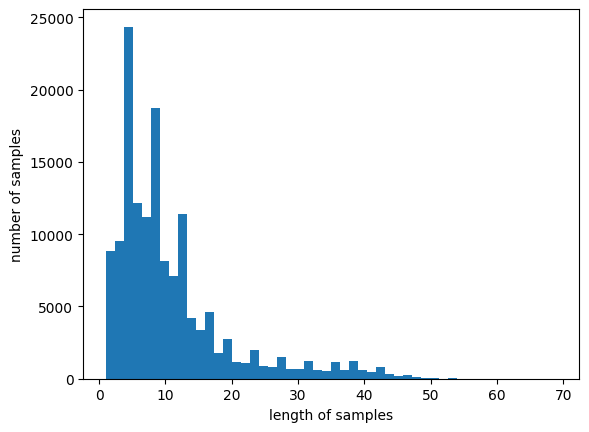

In [37]:
# X_train에 있는 각 리뷰의 길이를 확인하여 가장 긴 리뷰의 길이를 출력합니다.
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))

# X_train에 있는 모든 리뷰의 길이의 평균을 계산하고 출력합니다.
# map 함수를 사용하여 각 리뷰의 길이를 구하고, sum 함수로 총 길이를 합산한 후, 리뷰의 총 개수로 나눠 평균을 구합니다.
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))

# 히스토그램을 사용하여 리뷰의 길이 분포를 시각화합니다.
# X_train의 각 리뷰의 길이를 구하고, bins=50 옵션으로 50개의 구간으로 나누어 분포를 표시합니다.
plt.hist([len(review) for review in X_train], bins=50)

# x축의 라벨을 설정합니다.
plt.xlabel('length of samples')

# y축의 라벨을 설정합니다.
plt.ylabel('number of samples')

# 그래프를 화면에 표시합니다.
plt.show()


In [38]:
# 함수 정의: 최대 길이(max_len)와 중첩된 리스트(nested_list)를 인자로 받습니다.
def below_threshold_len(max_len, nested_list):

  # 길이가 max_len 이하인 내부 리스트의 개수를 저장할 변수를 초기화합니다.
  count = 0

  # nested_list 내의 각 내부 리스트에 대해서 반복합니다.
  for sentence in nested_list:

    # 해당 내부 리스트의 길이가 max_len 이하이면
    if(len(sentence) <= max_len):
        count = count + 1  # count 값을 1 증가시킵니다.

  # 계산된 비율을 출력합니다.
  # 길이가 max_len 이하인 내부 리스트의 개수(count)를 전체 내부 리스트의 개수(len(nested_list))로 나누어 비율을 계산하고, 그 값을 출력합니다.
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))


In [39]:
# 최대 길이를 30으로 설정합니다.
max_len = 30

# below_threshold_len 함수를 호출하여 X_train 내의 각 리뷰의 길이가 30 이하인 샘플들의 비율을 출력합니다.
below_threshold_len(max_len, X_train)


전체 샘플 중 길이가 30 이하인 샘플의 비율: 94.31944999380003


In [40]:
# pad_sequences 함수를 사용하여 X_train의 모든 시퀀스를 max_len으로 패딩합니다.
# 만약 시퀀스의 길이가 max_len보다 짧다면 0으로 패딩됩니다.
# 만약 시퀀스의 길이가 max_len보다 길다면 초과하는 부분이 잘려나갑니다.
X_train = pad_sequences(X_train, maxlen=max_len)

# 동일한 작업을 X_test에도 적용합니다.
X_test = pad_sequences(X_test, maxlen=max_len)


In [41]:
# 필요한 라이브러리와 모듈을 임포트합니다.
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 임베딩 벡터와 LSTM 유닛의 차원을 설정합니다.
embedding_dim = 100
hidden_units = 128

# 모델을 순차적으로 구성하기 위한 Sequential 객체를 생성합니다.
model = Sequential()

# 임베딩 레이어를 추가합니다. vocab_size 크기의 단어 집합을 embedding_dim 차원으로 임베딩합니다.
model.add(Embedding(vocab_size, embedding_dim))

# LSTM 레이어를 추가합니다. LSTM 유닛의 수는 hidden_units로 설정됩니다.
model.add(LSTM(hidden_units))

# 출력 레이어를 추가합니다. 이진 분류 문제이므로 sigmoid 활성화 함수를 사용합니다.
model.add(Dense(1, activation='sigmoid'))

# 조기 종료(EarlyStopping)를 사용하여 검증 데이터의 손실(val_loss)이 4번 연속 상승하면 훈련을 중단합니다.
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

# ModelCheckpoint를 사용하여 검증 데이터의 정확도(val_acc)가 이전보다 좋아질 경우에만 모델을 저장합니다.
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# 모델을 컴파일합니다. 옵티마이저로는 RMSprop를 사용하고, 손실 함수로는 binary_crossentropy를 사용합니다. 평가 메트릭으로는 정확도를 사용합니다.
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# 모델을 훈련합니다. 에포크는 15번, 배치 크기는 64, 검증 데이터는 전체 데이터의 20%를 사용합니다.
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)


Epoch 1/15
1815/1815 [==============================] - ETA: 0s - loss: 0.4108 - acc: 0.8102
Epoch 1: val_acc improved from -inf to 0.83729, saving model to best_model.h5
1815/1815 [==============================] - 53s 25ms/step - loss: 0.4108 - acc: 0.8102 - val_loss: 0.3707 - val_acc: 0.8373
Epoch 2/15
  15/1815 [..............................] - ETA: 14s - loss: 0.3500 - acc: 0.8417

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1815/1815 [==============================] - ETA: 0s - loss: 0.3459 - acc: 0.8492
Epoch 2: val_acc improved from 0.83729 to 0.84497, saving model to best_model.h5
1815/1815 [==============================] - 16s 9ms/step - loss: 0.3459 - acc: 0.8492 - val_loss: 0.3525 - val_acc: 0.8450
Epoch 3/15
1815/1815 [==============================] - ETA: 0s - loss: 0.3195 - acc: 0.8631
Epoch 3: val_acc improved from 0.84497 to 0.84841, saving model to best_model.h5
1815/1815 [==============================] - 15s 8ms/step - loss: 0.3195 - acc: 0.8631 - val_loss: 0.3492 - val_acc: 0.8484
Epoch 4/15
1815/1815 [==============================] - ETA: 0s - loss: 0.2959 - acc: 0.8772
Epoch 4: val_acc improved from 0.84841 to 0.85282, saving model to best_model.h5
1815/1815 [==============================] - 13s 7ms/step - loss: 0.2959 - acc: 0.8772 - val_loss: 0.3356 - val_acc: 0.8528
Epoch 5/15
1815/1815 [==============================] - ETA: 0s - loss: 0.2758 - acc: 0.8871
Epoch 5: val_acc improve

In [42]:
# 저장된 모델을 불러옵니다.
loaded_model = load_model('best_model.h5')

# 테스트 데이터를 사용하여 모델을 평가하고 정확도를 출력합니다.
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))


1527/1527 [==============================] - 6s 4ms/step - loss: 0.3459 - acc: 0.8496

 테스트 정확도: 0.8496


In [43]:
# 토크나이저 객체를 'tokenizer.pickle' 파일로 저장합니다.
with open('tokenizer.pickle', 'wb') as handle:
     pickle.dump(tokenizer, handle)

# 'tokenizer.pickle' 파일에서 토크나이저 객체를 로드합니다.
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)


In [44]:
def sentiment_predict(new_sentence):
    # 주어진 문장에서 한글과 공백을 제외하고 모든 문자를 제거
    new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)

    # 문장을 형태소로 분리/토큰화
    new_sentence = okt.morphs(new_sentence, stem=True)

    # 불용어를 제거
    new_sentence = [word for word in new_sentence if not word in stopwords]

    # 단어를 숫자 값, 인덱스로 변환
    encoded = tokenizer.texts_to_sequences([new_sentence])

    # 문장을 max_len(앞서 정의한 상수)길이로 패딩
    pad_new = pad_sequences(encoded, maxlen = max_len)

    # 패딩된 문장을 모델에 넣어 예측한다. 결과는 긍정의 확률로 나온다.
    score = float(loaded_model.predict(pad_new))

    # 긍정 확률이 0.5보다 크면 긍정, 아니면 부정으로 분류한다.
    if(score > 0.5):
        print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))


In [45]:
sentiment_predict('이 영화 개꿀잼 ㅋㅋㅋ')


1/1 [==============================] - 0s 370ms/step
84.71% 확률로 긍정 리뷰입니다.



In [46]:
sentiment_predict('이 영화 핵노잼 ㅠㅠ')


1/1 [==============================] - 0s 20ms/step
97.61% 확률로 부정 리뷰입니다.



In [47]:
sentiment_predict('이딴게 영화냐 ㅉㅉ')


1/1 [==============================] - 0s 20ms/step
99.81% 확률로 부정 리뷰입니다.



In [48]:
sentiment_predict('감독 뭐하는 놈이냐?')


1/1 [==============================] - 0s 17ms/step
99.27% 확률로 부정 리뷰입니다.



In [49]:
sentiment_predict('와 개쩐다 정말 세계관 최강자들의 영화다')


1/1 [==============================] - 0s 19ms/step
78.49% 확률로 긍정 리뷰입니다.

